In [1]:
# Get offline sniffing logs

sniffer_recs = []
with open("sniffer435.LOG") as f:
    for l in f:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-1-7745ca561f34>, line 3)

In [282]:
f = open("SNIFFERsandiskfat.LOG")

In [283]:
f.seek(0)

0

In [266]:
f_filtered = f.readlines()[468000:469000]
len(f_filtered)
with open('SNIFFERfiltered.LOG','w') as f:
    f.writelines(f_filtered)

In [276]:
# Define log_file as open("...") first
# Look for data rollovers, if the roll over value is near 2**32 it is an overflow, otherwise it is a reboot
lf_linenum = 0
last_timestamp = 0
for lf_line in f.readlines():
    lf_linenum += 1 
    try:
        this_timestamp = int(lf_line[:10])
    except ValueError:
        continue
    if last_timestamp > this_timestamp:
        print("Wrapped at line %d (%d -> %d)"%(lf_linenum,last_timestamp,this_timestamp))
    last_timestamp = this_timestamp

Wrapped at line 4161 (1297272993 -> 945269)
Wrapped at line 4545 (56957299 -> 345260)
Wrapped at line 16369 (1738075093 -> 1080040)
Wrapped at line 17566 (4292764228 -> 44474230)
Wrapped at line 18687 (4197303362 -> 820652)
Wrapped at line 22085 (4290068007 -> 2537643)
Wrapped at line 27034 (4286962397 -> 852383)
Wrapped at line 50619 (4294889993 -> 5270208)
Wrapped at line 74746 (4279401927 -> 5616349)
Wrapped at line 83493 (4293594049 -> 21863146)
Wrapped at line 89473 (4294948586 -> 8920)
Wrapped at line 93142 (4292901455 -> 3404506)
Wrapped at line 96618 (4017143259 -> 56285096)
Wrapped at line 96748 (4093727961 -> 13910411)
Wrapped at line 96817 (4087321032 -> 185107848)
Wrapped at line 96885 (4265693205 -> 150428421)
Wrapped at line 96996 (4167401574 -> 245082665)
Wrapped at line 97423 (4207282188 -> 532091759)
Wrapped at line 97628 (4169841016 -> 28750039)
Wrapped at line 98303 (4224759851 -> 493793)
Wrapped at line 98509 (4285840398 -> 163554)
Wrapped at line 99446 (4259115159 

In [284]:
sniffer_recs = sniffer_log_to_dict(f.readlines()[800345:1826527]) # Sandiskfat
#sniffer_recs = sniffer_log_to_dict(f.readlines()[16369:]) # Transcend

In [279]:
# Convert lines of frame to Python dictionaries
def sniffer_log_to_dict(sniffer_log: "List[Str]") -> "List[Dict]":
    ret_dicts = []
    last_timestamp = 0
    overflow_counts = 0
    for l in sniffer_log:
        ret_dict = {}
        try:
            this_timestamp = int(l[:10])/1e6
        except ValueError:
            # Corrupt frame
            continue
        if last_timestamp > this_timestamp:
            # Overflow, add 2**32
            overflow_counts += 1
        last_timestamp = this_timestamp
        this_timestamp += 2**32/1e6*overflow_counts
        ret_dict["timestamp"] = this_timestamp
        ret_dict["channel"] = int(l[13:15])
        ret_dict["rssi"] = int(l[18:21])
        ret_dict["frame_type"] = l[22:24]
        ret_dict["ds_flag"] = l[25:27]
        ret_dict["dest_mac"] = l[28:40]
        ret_dict["src_mac"] = l[41:53]
        ret_dicts += [ret_dict]
    return ret_dicts

In [280]:
max(d["timestamp"] for d in sniffer_recs)

221086.715311

In [268]:
# Density histogram
from collections import Counter
c = Counter(int(d["frame_type"],16) for d in sniffer_recs)

In [269]:
c

Counter({0: 3719,
         1: 8152,
         2: 1420,
         3: 896,
         4: 174999,
         5: 4761,
         6: 2954,
         7: 7163,
         8: 2,
         9: 6260,
         10: 1531,
         11: 7038,
         12: 6180,
         13: 27674,
         14: 6818,
         15: 14469,
         16: 10079,
         17: 12105,
         18: 4606,
         19: 2741,
         20: 789,
         21: 2576,
         22: 1224,
         23: 10214,
         24: 12442,
         25: 115759,
         26: 12694,
         27: 22624,
         28: 12064,
         29: 1512,
         30: 2887,
         31: 6527,
         32: 8163,
         33: 2222,
         34: 539,
         35: 5540,
         36: 145820,
         37: 11522,
         38: 5712,
         39: 20993,
         40: 106246,
         41: 738,
         42: 4961,
         43: 13335,
         44: 62743,
         45: 14673,
         46: 24460,
         47: 7219,
         48: 13251,
         49: 3008,
         50: 1248,
         51: 1793,
     

In [287]:
# Most common packet type in bins, takes about 15s to run
most_common_binned = [Counter(s["frame_type"] for s in sniffer_recs if i*1000 < s["timestamp"] < i*1000+1000) for i in range(300)]


In [288]:
mcb_values = [c.most_common(1) for c in most_common_binned]

In [289]:
mcb_values

[[('24', 3333)],
 [('24', 7005)],
 [('24', 7112)],
 [('24', 5956)],
 [('24', 6069)],
 [('24', 6209)],
 [('24', 5163)],
 [('24', 6088)],
 [('24', 4849)],
 [('24', 2449)],
 [('04', 3068)],
 [('04', 1435)],
 [('04', 1214)],
 [('3d', 1367)],
 [('3d', 1220)],
 [('19', 1582)],
 [('28', 1506)],
 [('04', 681)],
 [('19', 833)],
 [('19', 951)],
 [('19', 890)],
 [('19', 1088)],
 [('04', 617)],
 [('04', 615)],
 [('04', 317)],
 [('04', 381)],
 [('04', 326)],
 [('04', 395)],
 [('04', 281)],
 [('04', 330)],
 [('19', 650)],
 [('19', 518)],
 [('19', 566)],
 [('04', 182)],
 [('04', 178)],
 [('04', 203)],
 [('04', 129)],
 [('04', 110)],
 [('04', 106)],
 [('04', 117)],
 [('04', 106)],
 [('04', 70)],
 [('04', 71)],
 [('04', 95)],
 [('04', 85)],
 [('04', 36)],
 [('24', 1)],
 [('04', 2)],
 [],
 [('04', 9)],
 [],
 [('04', 4)],
 [('04', 7)],
 [('04', 6)],
 [('24', 23)],
 [('04', 98)],
 [('24', 63)],
 [('04', 21)],
 [('04', 28)],
 [('24', 221)],
 [('18', 142)],
 [('24', 132)],
 [('04', 116)],
 [('24', 319)],
 [

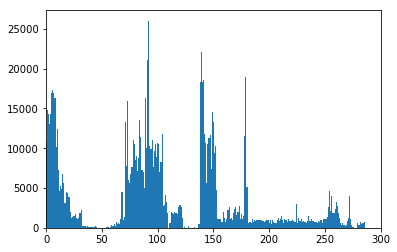

In [303]:
c = Counter(int(d["timestamp"]/1000) for d in sniffer_recs)
plt.bar(range(len(c.values())),list(c[i] for i in range(len(c.values()))),width=1.0)# Color with most common frame type
plt.xlim(0,300)
plt.show()

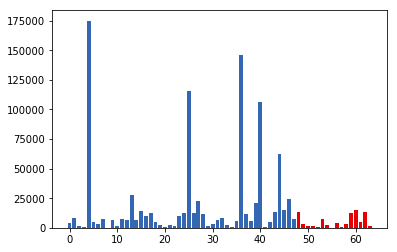

In [290]:
c = Counter(int(d["frame_type"],16) for d in sniffer_recs)
plt.bar(list(range(64)),list(c[i] for i in range(64)),color=[[0.2,0.4,0.7]]*48+[[0.9,0,0]]*16)
plt.show()

In [101]:
sniffer_recs_filtered = set(d["src_mac"][:6] for d in sniffer_recs)

In [94]:
len(sniffer_recs_filtered)

28040

In [102]:
'000f74' in list(sniffer_recs_filtered)

True

In [130]:
sniffer_recs_plot = [d for d in sniffer_recs if '009569' in d["src_mac"]]

In [131]:
len(sniffer_recs_plot)

27

In [132]:
min([int(d["frame_type"],16)/64 for d in sniffer_recs_plot])

0.0625

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

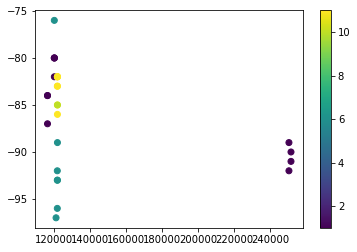

In [133]:
plt.scatter([d["timestamp"] for d in sniffer_recs_plot],[d["rssi"] for d in sniffer_recs_plot],c=[d["channel"] for d in sniffer_recs_plot])
plt.colorbar()
plt.show()

In [97]:
sniffer_recs_filtered = [oui_dict[d] for d in list(sniffer_recs_filtered)[:] if d in oui_dict.keys()]

In [98]:
len(sniffer_recs_filtered)

1868

In [99]:
list(set(sniffer_recs_filtered))

['MTN Electronic Co. Ltd',
 'NVIDIA',
 'Chi Mei Communication Systems, Inc',
 'FORE SYSTEMS, INC.',
 'Sanritz Corporation',
 'SIGMEX LTD.',
 'Yokogawa Digital Computer Corporation',
 'NETWORK RESOURCES CORPORATION',
 'IMC NETWORKS CORP.',
 'Allied Telesis, Inc.',
 'SEIKO SYSTEMS, INC.',
 'CIMLINC INCORPORATED',
 'SOFTLAB, INC.',
 'EDUCATIONAL TECHNOLOGY RESOURCES, INC.',
 'CAMTEC ELECTRONICS LTD.',
 'SIECOR CORPORATION',
 'RG Nets, Inc.',
 'MTX, INC.',
 'Shanghai Xiaoyi Technology Co., Ltd.',
 'ELGIN S.A.',
 'ALPS ELECTRIC CO.,LTD.',
 'APRIL',
 'VICOM SYSTEMS, INC.',
 'ASANTE TECHNOLOGIES',
 'SUPERNET',
 'AMPAK Technology, Inc.',
 'MARLI S.A.',
 'HAYES MICROCOMPUTER PRODUCTS',
 'TCL INCORPORATED',
 'LSD Science and Technology Co.,Ltd.',
 'Cayee Computer Ltd.',
 'Hand Held Products Inc',
 'Airbus Defence and Space Deutschland GmbH',
 'YOUTH KEEP ENTERPRISE CO LTD',
 'SYNTECH(HK) TECHNOLOGY LIMITED',
 'COMPUTEX CO., LTD.',
 'SCITEX CORPORATION LTD.',
 'SBE, INC.',
 'Novell, Inc.',
 'DONG

In [24]:
oui_txt = []
with open("oui.txt",encoding="utf8") as f:
    oui_txt = list(f)

In [29]:
oui_txt = [o for o in oui_txt[:] if "(base 16)" in o]

In [33]:
oui_txt[2]

'3CD92B     (base 16)\t\tHewlett Packard\n'

In [34]:
# Post processing oui_txt
oui_dict = {}
for o in oui_txt:
    oui_dict[o[:6].lower()] = o.split('\t\t')[1].strip()

In [13]:
from collections import Counter

In [26]:
Counter(d["rssi"] for d in sniffer_recs).most_common(10)

[(-86, 4659),
 (-87, 4578),
 (-88, 4480),
 (-85, 4315),
 (-89, 4153),
 (-84, 4144),
 (-83, 3879),
 (-90, 3587),
 (-82, 3562),
 (-81, 3308)]

In [37]:
common_src_macs = set(d["src_mac"] for d in sniffer_435) & set(d["src_mac"] for d in sniffer_436) & set(d["src_mac"] for d in sniffer_437)

In [38]:
for m in common_src_macs:
    

26

In [291]:
# Find unique mac addresses
sniffer_recs_pr = [s for s in sniffer_recs if s["frame_type"] == "04"]

In [295]:
srpr_plot = list(set(s["src_mac"] for s in sniffer_recs_pr))
len(srpr_plot)

21844

In [296]:
sr_uniq_macs = Counter(s["src_mac"] for s in sniffer_recs)
sr_uniq_macs.most_common(10)

[('a8b86e501420', 44608),
 ('d065ca104050', 38194),
 ('28c2dd3022eb', 20012),
 ('00478429ff3f', 18290),
 ('2cf0ee2c6c50', 15037),
 ('e0accb8341c0', 12439),
 ('e89eb497e79f', 11978),
 ('14109fe2838d', 11364),
 ('c0cecdc064a6', 11192),
 ('ec3dfddcceea', 10460)]

In [315]:
def plot_type_rssi(mac):
    plt.figure()
    sr_thismac = [s for s in sniffer_recs if s["src_mac"] == mac]
    plt.scatter([s["timestamp"]/1000 for s in sr_thismac],[s["rssi"] for s in sr_thismac],norm=plt.Normalize(0,64),c=[int(s["frame_type"],16) for s in sr_thismac])
    plt.xlim(0,300)
    plt.ylim(-100,-30)
    plt.colorbar()
    plt.title(mac+' frame type')
    plt.plot()

    plt.figure()
    sr_thismac = [s for s in sniffer_recs if s["src_mac"] == mac]
    plt.scatter([s["timestamp"]/1000 for s in sr_thismac],[s["rssi"] for s in sr_thismac],norm=plt.Normalize(0,14),c=[int(s["channel"]) for s in sr_thismac])
    plt.xlim(0,300)
    plt.ylim(-100,-30)
    plt.colorbar()
    plt.title(mac+' channel')
    plt.plot()

[None, None, None]

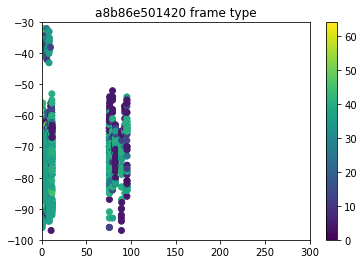

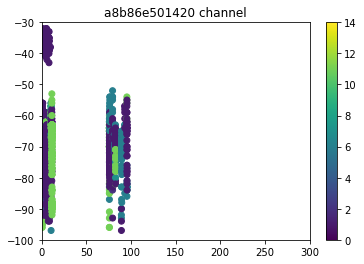

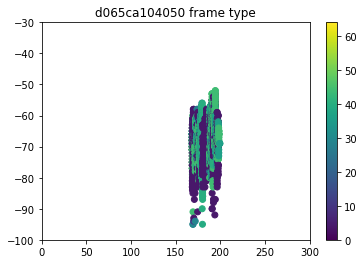

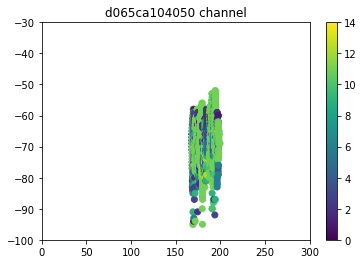

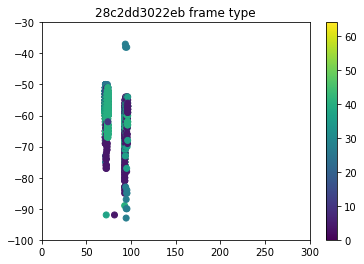

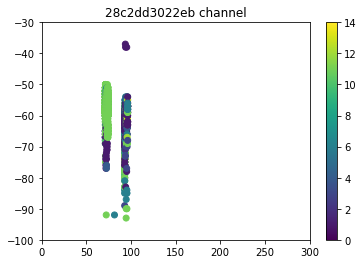

In [316]:
[plot_type_rssi(mac[0]) for mac in sr_uniq_macs.most_common(3)]